# *part 1*

In [ ]:
import numpy as np
import sys
import os

# Ensure we can import from the lib folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.network import Network
from lib.layers import Dense
from lib.activations import Tanh, Sigmoid
from lib.losses import mse, mse_prime
from lib.optimizer import SGD
from lib.training_history import plot_performance

# 1. Prepare Data (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# 2. Build Architecture 
# 2 inputs -> 4 hidden units -> 1 output
net = Network()
net.add(Dense(2, 4))
net.add(Tanh())      # Activation for hidden layer
net.add(Dense(4, 1))
net.add(Sigmoid())   # Activation for output (0 to 1)

# 3. Setup Training 
net.use_loss(mse, mse_prime)
optimizer = SGD(learning_rate=1.0)

# 4. Train
print("Training XOR...")
# Capture the history
errors, accuracies = net.train(X, Y, epochs=2000, optimizer=optimizer)

# 5. Plot Results 
plot_performance(errors, accuracies)

# 6. Verify Final Predictions
print("\nFinal Predictions:")
predictions = net.predict(X)
for x, p in zip(X, predictions):
    print(f"Input: {x}, Pred: {p[0]:.4f}, Rounded: {round(p[0])}")

# *part 2*

MNIST Loaded: Train shape (5000, 784), Test shape (5000, 784)
Training Autoencoder...
--- Network Architecture Check ---
Layer 0: Weights (784, 128)
Layer 2: Weights (128, 64)
Layer 4: Weights (64, 128)
Layer 6: Weights (128, 784)
Epoch 1/20, Loss: 0.2084
Epoch 2/20, Loss: 0.0863
Epoch 3/20, Loss: 0.0718
Epoch 4/20, Loss: 0.0693
Epoch 5/20, Loss: 0.0678
Epoch 6/20, Loss: 0.0663
Epoch 7/20, Loss: 0.0649
Epoch 8/20, Loss: 0.0636
Epoch 9/20, Loss: 0.0621
Epoch 10/20, Loss: 0.0607
Epoch 11/20, Loss: 0.0591
Epoch 12/20, Loss: 0.0575
Epoch 13/20, Loss: 0.0559
Epoch 14/20, Loss: 0.0543
Epoch 15/20, Loss: 0.0528
Epoch 16/20, Loss: 0.0514
Epoch 17/20, Loss: 0.0501
Epoch 18/20, Loss: 0.0488
Epoch 19/20, Loss: 0.0477
Epoch 20/20, Loss: 0.0465


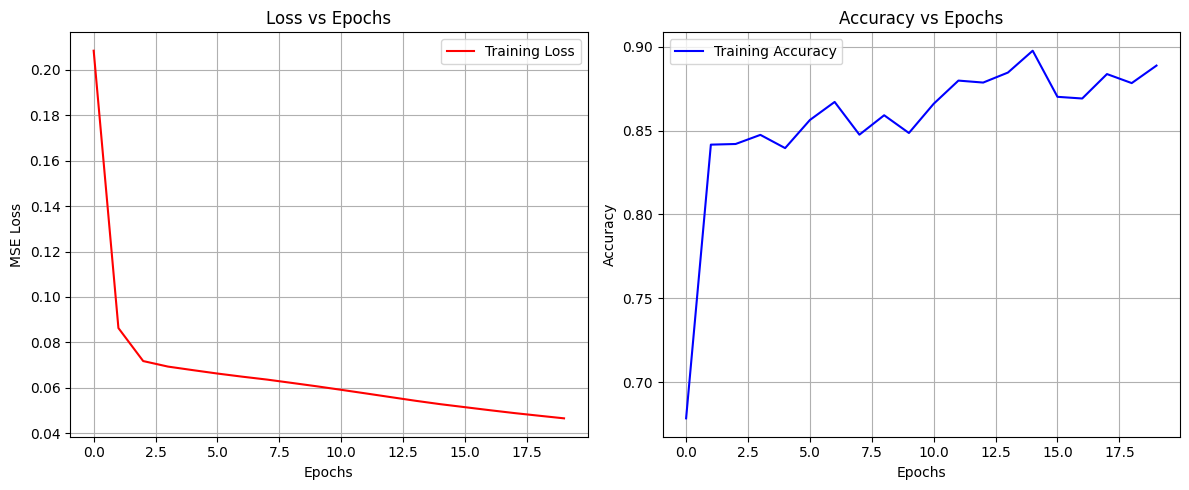

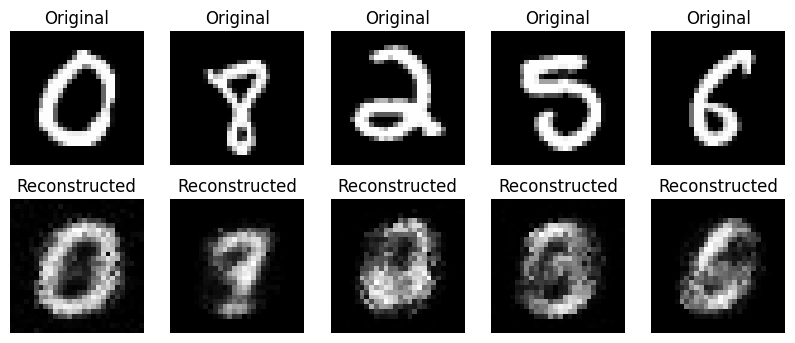

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# Ensure we can import from lib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.network import Network
from lib.encoder import build_encoder
from lib.decoder import build_decoder
from lib.losses import mse, mse_prime
from lib.optimizer import SGD
from lib.data_loader import load_mnist
from lib.training_history import plot_performance

# 1. Load Data
# We use a limit of 5000 images first to ensure it works quickly.
# Once verified, you can increase this or remove the limit.
x_train, y_train, x_test, y_test = load_mnist(limit=5000)

# 2. Build the Autoencoder
# We create the parts...
encoder = build_encoder(input_size=784, latent_size=64)
decoder = build_decoder(latent_size=64, output_size=784)

# ...and stitch them together into one network
autoencoder = Network()
for layer in encoder.layers:
    autoencoder.add(layer)
for layer in decoder.layers:
    autoencoder.add(layer)

# 3. Setup Training
autoencoder.use_loss(mse, mse_prime)
optimizer = SGD(learning_rate=0.5) 

# 4. Train
print("Training Autoencoder...")

# Add this block before autoencoder.train(...)
print("--- Network Architecture Check ---")
for i, layer in enumerate(autoencoder.layers):
    if hasattr(layer, 'weights'):
        print(f"Layer {i}: Weights {layer.weights.shape}")
# Note: For Autoencoders, Input (x_train) is also the Target (x_train) [cite: 48]
# We don't care about y_train (digit labels) for this part.
errors, accuracies = autoencoder.train(x_train, x_train, epochs=20, optimizer=optimizer, batch_size=32)

# 5. Plot Loss Curve
plot_performance(errors, accuracies)

# 6. Visualize Reconstruction
# Let's pick 5 random images from the test set
num_images = 5
indices = np.random.randint(0, len(x_test), num_images)
test_images = x_test[indices]

# Get reconstructions

reconstructed = autoencoder.predict(test_images)

# Plot Original vs Reconstructed
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()